# 离群值

## 二变量

outliers_bivariate

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.0f}'.format

covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# set up the cumulative and demographic columns
covidtotals.info()

# 'location', 为 string 字段不能转换为 float 不可用于 Correlation matrix 计算
totvars = ['total_cases_mill','total_deaths_mill']
demovars = ['population_density','aged_65_older',
   'gdp_per_capita','life_expectancy','diabetes_prevalence']

covidkeys = covidtotals.loc[:, totvars + demovars]

# 生成累积数据和人口统计数据的相关矩阵
corrmatrix = covidkeys.corr(method="pearson")
corrmatrix

sns.heatmap(corrmatrix, xticklabels=corrmatrix.columns,
  yticklabels=corrmatrix.columns, cmap="coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

# 看看某些国家的病例数是否会出现意想不到的低死亡率或高死亡率
covidkeys['total_cases_q'] = \
  pd.qcut(covidkeys['total_cases_mill'],
  labels=['very low','low','medium','high','very high'],
  q=5, precision=0)
covidkeys['total_deaths_q'] = \
  pd.qcut(covidkeys['total_deaths_mill'],
  labels=['very low','low','medium','high','very high'],
  q=5, precision=0)

pd.crosstab(covidkeys.total_cases_q, covidkeys.total_deaths_q)
covidkeys[['total_cases_mill','total_deaths_mill','population_density']].mean()
# TypeError: 'Categorical' with dtype category does not support reduction 'mean'
# covidkeys.mean()

covidtotals.loc[(covidkeys. \
  total_cases_q=="very high") & \
  (covidkeys.total_deaths_q=="medium")].T

covidtotals.loc[(covidkeys. \
  total_cases_q=="medium") & \
  (covidkeys.total_deaths_q=="very high")].T

# 散点图

scatter plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)
landtemps = pd.read_csv("data/landtemps2019avgs.csv")

# 将病例总数与死亡总数进行散点图分析
ax = sns.regplot(x="total_cases_mill", y="total_deaths_mill", data=covidtotals)
ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total Covid Cases and Deaths by Country")
plt.show()

fig, axes = plt.subplots(1,2, sharey=True)
sns.regplot(x=covidtotals.aged_65_older, y=covidtotals.total_cases_mill, ax=axes[0])
sns.regplot(x=covidtotals.gdp_per_capita, y=covidtotals.total_cases_mill, ax=axes[1])
axes[0].set_xlabel("Aged 65 or Older")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Age 65 Plus and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


# show the high elevation points in a different color
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
low.shape[0], low.avgtemp.mean()
high.shape[0], high.avgtemp.mean()

plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")
plt.show()

# show scatter plot with different regression lines by elevation group
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="red"), legend_out=False, data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()

# show this as a 3D plot
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2019")
ax = plt.axes(projection='3d')
ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(landtemps.elevation, landtemps.latabs, landtemps.avgtemp)
plt.show()

# 分组方框图

grouped boxplots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 25)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97.info()

# view some descriptive statistics
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)

nls97.groupby(['highestdegree'])['weeksworked17'].\
  apply(gettots).unstack()

# do boxplots for weeks worked by highest degree earned
myplt = sns.boxplot(x='highestdegree',y='weeksworked17', data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

# view minimum, maximum, median, and first and third quartile values
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

# do boxplots for cases per million by region
sns.boxplot(x='total_cases_mill', y='region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_mill", data=covidtotals, size=1.5, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# 回归影响

regression influence

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
pd.set_option('display.width', 70)
pd.options.display.float_format = '{:,.3f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# take a look at the distribution of some key features
xvars = ['population_density','aged_65_older',
 'gdp_per_capita','diabetes_prevalence']

covidtotals[['total_cases_mill'] + xvars].\
  quantile(np.arange(0.0,1.05,0.25))

# fit a linear regression model
# return the influence of each observation
# also return model coefficients
def getlm(df, ycolname, xcolnames):
  df = df[[ycolname] + xcolnames].dropna()
  y = df[ycolname]
  X = df[xcolnames]
  X = sm.add_constant(X)
  lm = sm.OLS(y, X).fit()
  influence = lm.get_influence().summary_frame()
  coefficients = pd.DataFrame(zip(['constant'] + xcolnames,
    lm.params, lm.pvalues), columns=['features','params',
    'pvalues'])
  return coefficients, influence, lm

coefficients, influence, lm = getlm(covidtotals, 'total_cases_mill', xvars)
coefficients

# identify countries with an outsized influence on the model
influencethreshold = 3*influence.cooks_d.mean()
covidtotals = covidtotals.join(influence[['cooks_d']], how="left", on=None, validate="many_to_many")
covidtotalsoutliers = \
  covidtotals.loc[covidtotals.cooks_d>influencethreshold]
covidtotalsoutliers.shape

covidtotalsoutliers[['location','total_cases_mill','cooks_d'] + \
  xvars].sort_values(['cooks_d'], ascending=False).head()

coefficients, influence, lm2 = \
  getlm(covidtotals.drop(['HKG','SGP']),
  'total_cases_mill', xvars)
coefficients

,features,params,pvalues
0,constant,"-2,864.219",0.653
1,population_density,26.989,0.005
2,aged_65_older,"2,669.281",0.000
3,gdp_per_capita,0.553,0.000
4,diabetes_prevalence,319.262,0.605


# 离群值_KNN

outliers knn

In [ ]:
import pandas as pd
# pip install pyod -i https://pypi.tuna.tsinghua.edu.cn/simple
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# create a standardized dataset of the analysis variables

standardizer = StandardScaler()
analysisvars = ['location','total_cases_mill','total_deaths_mill',
  'population_density','diabetes_prevalence','aged_65_older',
  'gdp_per_capita']
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

# run the KNN model and generate anomaly scores
clf_name = 'KNN'
clf = KNN(contamination=0.1)
clf.fit(covidanalysisstand)
y_pred = clf.labels_
y_scores = clf.decision_scores_

# show the predictions from the model
pred = pd.DataFrame(zip(y_pred, y_scores), 
  columns=['outlier','scores'], 
  index=covidanalysis.index)
pred.outlier.value_counts()
pred.groupby(['outlier'])[['scores']].\
  agg(['min','median','max'])

# show covid data for the outliers
covidanalysis = covidanalysis.join(pred).\
  loc[:,analysisvars + ['scores']].\
  sort_values(['scores'], ascending=False)
covidanalysis.head(10)

# show the score for Japan
covidanalysis.loc['JPN','scores']

np.float64(2.0297736785377474)

# 隔离森林

isolation forest

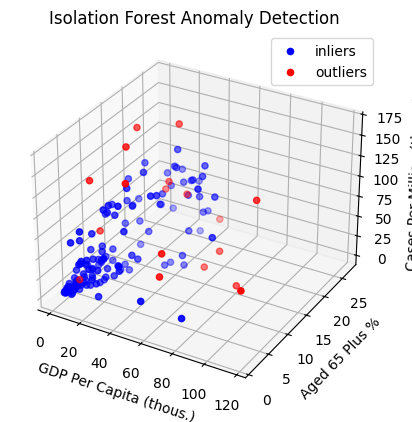

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 70)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 7)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
covidtotals = pd.read_csv("data/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# create a standardized analysis data frame
analysisvars = ['location','total_cases_mill','total_deaths_mill',
  'population_density','aged_65_older','gdp_per_capita']
standardizer = StandardScaler()
covidanalysis = covidtotals.loc[:, analysisvars].dropna()
covidanalysisstand = standardizer.fit_transform(covidanalysis.iloc[:, 1:])

# run an isolation forest model to detect outliers
clf=IsolationForest(n_estimators=50, max_samples='auto',
  contamination=.1, max_features=1.0, random_state=3144)
clf.fit(covidanalysisstand)
covidanalysis['anomaly'] = clf.predict(covidanalysisstand)
covidanalysis['scores'] = clf.decision_function(covidanalysisstand)
covidanalysis.anomaly.value_counts()

# view the outliers
inlier, outlier = covidanalysis.loc[covidanalysis.anomaly==1],\
  covidanalysis.loc[covidanalysis.anomaly==-1]
outlier[['location','total_cases_mill','total_deaths_mill',
  'scores']].sort_values(['scores']).head(10)

# plot the inliers and outliers
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel("Cases Per Million (thous.)")
ax.set_xlabel("GDP Per Capita (thous.)")
ax.set_ylabel("Aged 65 Plus %")
ax.scatter3D(inlier.gdp_per_capita/1000, inlier.aged_65_older, inlier.total_cases_mill/1000, label="inliers", c="blue")
ax.scatter3D(outlier.gdp_per_capita/1000, outlier.aged_65_older, outlier.total_cases_mill/1000, label="outliers", c="red")
ax.legend()
plt.show()